## Interactive data testing - Air Temperature
Interactively test air temperature data from data.csv.

In [1]:
#"magic" uses ipympl
%matplotlib widget  
import pandas as pd
import matplotlib.pyplot as plt
import envirodataqc as envqc

### Load data.csv

In [2]:
data = pd.read_csv('../data/data.csv', index_col=0, parse_dates=True)

In [3]:
data.head()

,temperature_C,humidity_%,pressure_mb,windspeed_10min_avg,winddir_10min_avg,rain_rate
2021-03-07 00:00:00,-2.2,59.7,811.5,1.2,179.1,0.00
2021-03-07 00:10:00,-4.0,64.9,811.6,2.1,288.1,0.00
2021-03-07 00:20:00,-4.4,66.0,811.7,2.4,317.2,0.06
2021-03-07 00:30:00,-4.0,65.3,811.6,2.3,319.2,0.00
2021-03-07 00:40:00,-4.1,65.0,811.6,2.0,320.2,0.00


## Run check vals

In [4]:
#Calculate flags on wind data
airdata = envqc.check_vals(data['temperature_C'],'air_temperature')


In [5]:
airdata['maxflag'] = airdata[['flags_range','flags_rate','flags_flat']].max(1)

In [6]:
suspdata = data.loc[airdata.maxflag == 1,'temperature_C']
baddata = data.loc[airdata.maxflag ==2,'temperature_C']

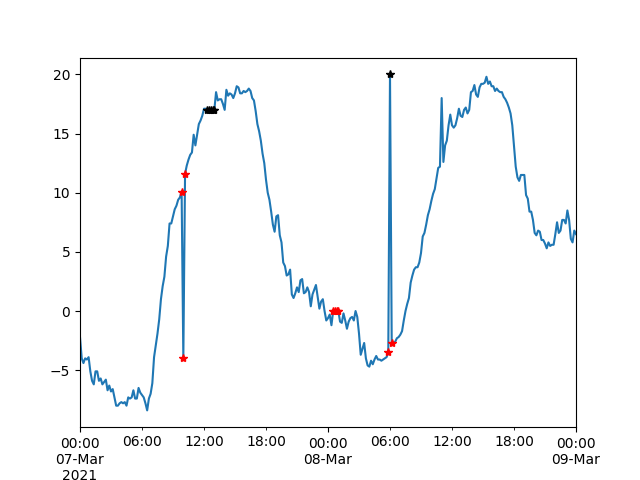

In [8]:
fig, axs = plt.subplots(1,1)
airdata['values'].plot(ax = axs)

if(not suspdata.empty): suspdata.plot(ax=axs,style='*r')
if(not baddata.empty): baddata.plot(ax=axs,style='*k')

#### Flatlining
* Flatlining sections correctly flagged as either suspicious or bad.
* A short section of flatlining around 18:00 3/8 is correctly NOT labeled because it is short.
#### Spiking
* Current settings are less sensitive than I expected and it took some pretty good spikes to be identified as suspicious or bad.
* A spike around noon 3/8 isn't flagged, but looks suspicious to me. Maybe the settings are too low?